# Loading file from previous code

In [1]:
import keras

In [2]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

# Model Building

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Model Training

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
history=model.fit(train_data,train_target,epochs=5,validation_split=0.2)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 78s 870ms/step - accuracy: 0.6016 - loss: 0.7112 - val_accuracy: 0.7362 - val_loss: 0.5139
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 74s 864ms/step - accuracy: 0.7649 - loss: 0.5061 - val_accuracy: 0.8513 - val_loss: 0.3766
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 75s 867ms/step - accuracy: 0.8380 - loss: 0.3545 - val_accuracy: 0.8980 - val_loss: 0.2953
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 74s 862ms/step - accuracy: 0.8837 - loss: 0.2685 - val_accuracy: 0.9155 - val_loss: 0.2404
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 75s 870ms/step - accuracy: 0.9123 - loss: 0.2098 - val_accuracy: 0.9227 - val_loss: 0.2122


## Saving the model

In [13]:
model.save('my_model.h5')

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


# Graph of loss


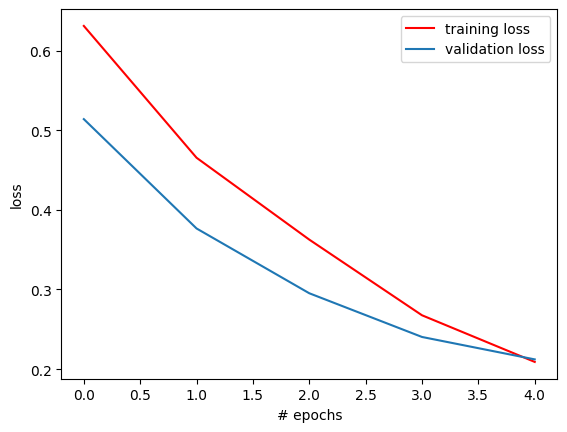

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Graph of Accuracy

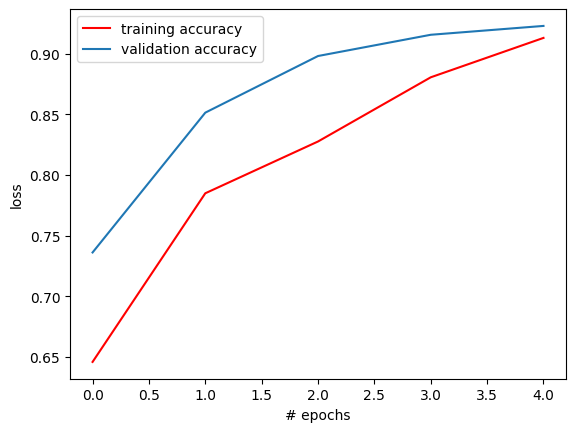

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Test Accuracy

In [14]:
import os

file_path = 'Desktop/Bhai/my_model.h5'
if os.path.exists(file_path):
    print("File exists")
else:
    print("File not found")


File not found


In [16]:
from keras.models import load_model
best_model = load_model('my_model.h5')
y_pred = best_model.predict(test_data)
accuracy = best_model.evaluate(test_data, test_target)[1]
print('Test Accuracy:', accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step - accuracy: 0.9176 - loss: 0.2109
Test Accuracy: 0.9107611775398254


# Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
# Make predictions on test data
predictions = model.predict(test_data)
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Convert test target to class labels
true_labels = np.argmax(test_target, axis=1)
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step
[[185   8]
 [ 26 162]]


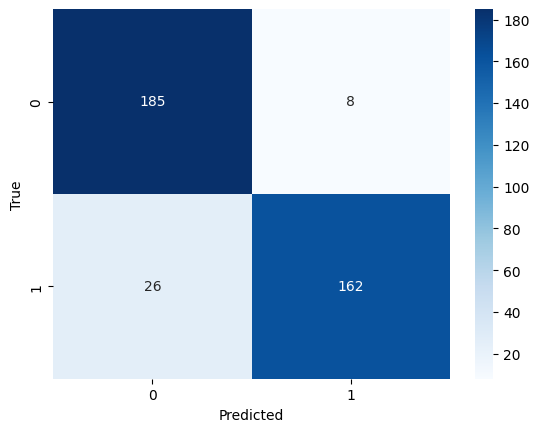

In [18]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(
      np.argmax(model.predict(test_data), axis=1),
      np.argmax(test_target, axis = 1)
     )
print(cr)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       211
           1       0.86      0.95      0.91       170

    accuracy                           0.91       381
   macro avg       0.91      0.91      0.91       381
weighted avg       0.92      0.91      0.91       381



# Model Summary

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 98, 98, 200)           │       2,000 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation (Activation)            │ (None, 98, 98, 200)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 49, 49, 200)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 47, 47, 100)           │     180,100 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_1 (Activation)          │ (None, 47, 47, 100)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 23, 23, 100)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 52900)                 │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout (Dropout)                  │ (None, 52900)                 │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 50)                    │   2,645,050 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 2)                     │         102 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 8,481,758 (32.36 MB)

 Trainable params: 2,827,252 (10.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,654,506 (21.57 MB)